In [22]:
import numpy as np
from pyairtable import Table,Api
import pandas as pd
from pprint import pprint
from scipy.stats import t
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
api = Api('patkECjZGaeJ3Rj2F.902a4dc39c614cbcba594a1d909db35a39dcd69f43d2bf692aaf32268c4d60d7')
tableMessages = api.table('appY85YsYveVhA1eC', 'Messages')
data=tableMessages.all()
fields = [record['fields'] for record in data]
df=pd.DataFrame(fields)

In [5]:
print(df.iloc[49])
type(df)

message            Salve Massimo, sono Davide Morra, co-founder d...
lead                                                   Massimo Miele
efficacy                                                         3.0
transparency                                                     3.0
coherence                                                        3.0
safety                                                           3.0
lead_data          54a2a5997468693fda81bd32 Massimo Miele 34 Sale...
fluency                                                          2.0
company_type                                              IT company
lead_title                                     Sales Account Manager
accuracy                                                         2.0
human alignment                                                  1.0
other              errori di grammatica, contemplare non è adatto...
company_data       NAMIRIAL S.P.A. namirial  15 namirial.com nami...
model                             

pandas.core.frame.DataFrame

In [6]:
#metrics_columns = ['accuracy', 'hallucination', 'efficacy', 'fluency', 'coherence', 'transparency', 'safety', 'human_alignment']
grouped_df=df.groupby(['model'])

In [27]:
columns = ['accuracy','hallucination','efficacy','fluency','coherence','transparency','safety','human alignment']
dff=grouped_df[columns]
# Iterating through each group and printing its content

In [28]:
print(dff.mean())

                    accuracy  hallucination  efficacy   fluency  coherence  \
model                                                                        
gemma-7b-it         1.913043       2.521739  2.000000  2.304348   2.521739   
gpt-3.5-turbo       2.318182       2.772727  2.318182  2.727273   2.772727   
llama3-70b-8192     2.521739       2.956522  2.434783  2.565217   2.782609   
llama3-8b-8192      1.956522       2.608696  2.000000  2.173913   2.391304   
mixtral-8x7b-32768  2.347826       2.826087  2.478261  2.695652   2.826087   

                    transparency    safety  human alignment  
model                                                        
gemma-7b-it             2.869565  3.000000         2.043478  
gpt-3.5-turbo           2.909091  3.000000         2.590909  
llama3-70b-8192         2.913043  3.000000         2.521739  
llama3-8b-8192          2.695652  2.913043         2.086957  
mixtral-8x7b-32768      2.956522  3.000000         2.521739  


In [ ]:
def calculate_accuracy(avg_grades):
    #input parameter
    confidence_level = 0.98
    length_grades=len(avg_grades)
    mean = np.mean(avg_grades)
    std_dev = np.std(avg_grades, ddof=1)
    t_value = t.ppf(confidence_level,len(avg_grades)-1)
    lower_bound = mean - ((t_value * std_dev)/math.sqrt(length_grades))
    upper_bound = mean + ((t_value * std_dev)/math.sqrt(length_grades))
            
    #Formula for relative error and accuracy
    delta = (upper_bound-lower_bound)/2
    rel_error = delta/mean
    accuracy=1-rel_error
    return accuracy

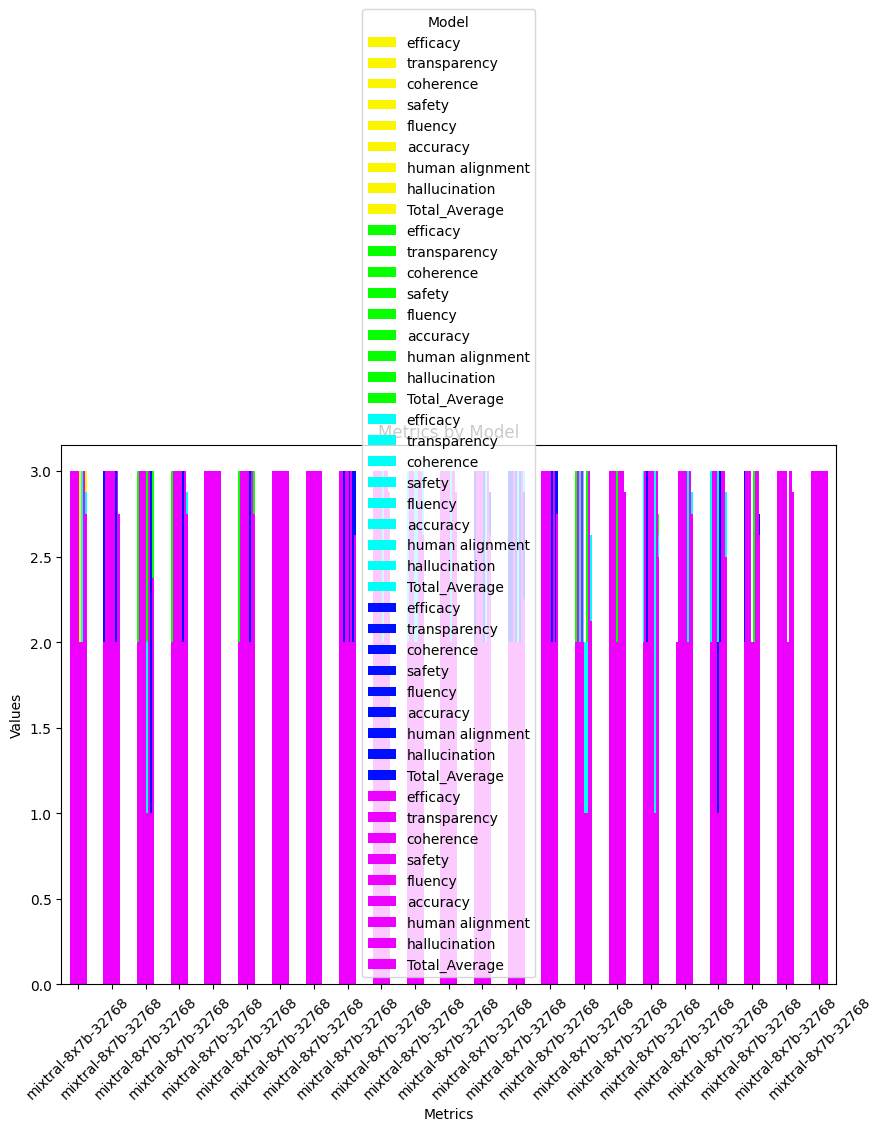

In [33]:
#dff.set_index('model', inplace=True)

# Set up the matplotlib figure
palette = sns.color_palette("hsv", len(grouped_df))
# Flatten axes for easy iteration
fig, ax = plt.subplots(figsize=(10, 7))

# Plot each metric
for (name, group), color in zip(grouped_df, palette):  # Drop 'model' column for plotting
    fig, ax = plt.subplots(figsize=(8, 6))
    group.plot(kind='bar', ax=ax, color=color, label=name, x='model', legend=None)
    ax.set_title('Metrics by Model')
    ax.set_xlabel('Metrics')
    ax.set_ylabel('Values')
    ax.legend(title='Model')
    plt.xticks(rotation=45)
    plt.show()
    